###  Homework 4

1.) Reconsider the facility location problem of Example 3.2, but now assume
that the response time from point $(x_0, y_0)$ to point $(x_1, y_1)$ is proportional
to the road travel distance $|x_1 − x_0| + |y_1 − y_0|$.


**Example 3.2** 
A suburban community intends to replace its old fire station
with a new facility. City planners intend to locate the new facility more scientifically. A statistical
analysis of response–time data yielded an estimate of $3.2 + 1.7r^{0.91}$ minutes
required to respond to a call r miles away from the station. Estimates of
the frequency of calls from different areas of the city were obtained from the fire
chief. They are presented in Figure 3.7. Each block represents one square mile,
and the numbers inside each block represent the number of emergency calls per
year for that block. Find the best location for the new facility.


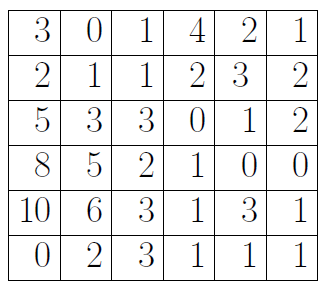

Figure 3.7 (see figure3.7.png)

(a) Find the location that minimizes average response time. Use the
five-step method, and model as a multivariable unconstrained optimization
problem.





In [2]:
using PyPlot
using Distributions

The function f will return the road distance from the station $(x,y)$ to an intersection (x0, y0) with $|x-x_0+ |y-y_0|$then raise it to the $0.91$ power, that value is taken from our response-time formula, then muliplity by a weight $nb$ that represents the number of calls in that touch that intersection. It is used in the next formula $z$ below

In [3]:
function f(x,y,x0,y0,nb)
    return nb*(abs(x-x0)+abs(y-y0)).^(0.91)
end

f (generic function with 1 method)

The function $z$ returns the average response time given the station location at $(x,y)$. It uses the function f to calculate the average time to each individual intersection (9 in total) weighted by the number of calls, then divides by the total number of calls, $84$, to get an average time. We will minimize this function to the optimal location for the station.

In [4]:
# The function I want to maximize
function z(x,y)
  
    return 3.2+1.7/84* (f(x,y,1,5,6)+f(x,y,3,5,8)+f(x,y,5,5,8)+f(x,y,1,3,21)+f(x,y,3,3,6)+f(x,y,5,3,3)+f(x,y,1,1,18)+f(x,y,3,1,8)+f(x,y,5,1,6))
end


z (generic function with 1 method)

Here we text 3721 locations, every tenth of a mile from $x=0$ to $x=6$ and every tenth of a mile from $y=0$ to $y=6$. This 61 by 61 array will give us a contour plot of the average response time. From the contour plot we will pick an area to examine closer.

In [5]:
xx=0:0.1:6
yy=0:0.1:6
xgrid = repmat(xx',61,1)
ygrid = repmat(yy,1,61)
zz=z(xgrid,ygrid)

61×61 Array{Float64,2}:
 10.61     10.4745   10.3387   …  12.006   12.1382  12.2703  12.4021
 10.4745   10.3387   10.2026      11.8735  12.006   12.1382  12.2703
 10.3387   10.2026   10.0662      11.7407  11.8735  12.006   12.1382
 10.2026   10.0662    9.92931     11.6077  11.7407  11.8735  12.006 
 10.0662    9.92931   9.79207     11.4744  11.6077  11.7407  11.8735
  9.92931   9.79207   9.65442  …  11.3409  11.4744  11.6077  11.7407
  9.79207   9.65442   9.51633     11.2071  11.3409  11.4744  11.6077
  9.65442   9.51633   9.37777     11.0729  11.2071  11.3409  11.4744
  9.51633   9.37777   9.23873     10.9385  11.0729  11.2071  11.3409
  9.37777   9.23873   9.09915     10.8037  10.9385  11.0729  11.2071
  9.23873   9.09915   8.95901  …  10.6686  10.8037  10.9385  11.0729
  9.21128   9.07188   8.93194     10.6406  10.7756  10.9103  11.0447
  9.18332   9.04407   8.90429     10.6122  10.7471  10.8817  11.0161
  ⋮                            ⋱                              ⋮     
  9.8602  

This block returns the image of a contour plot, this allows us to better guess the location of the optimal position.

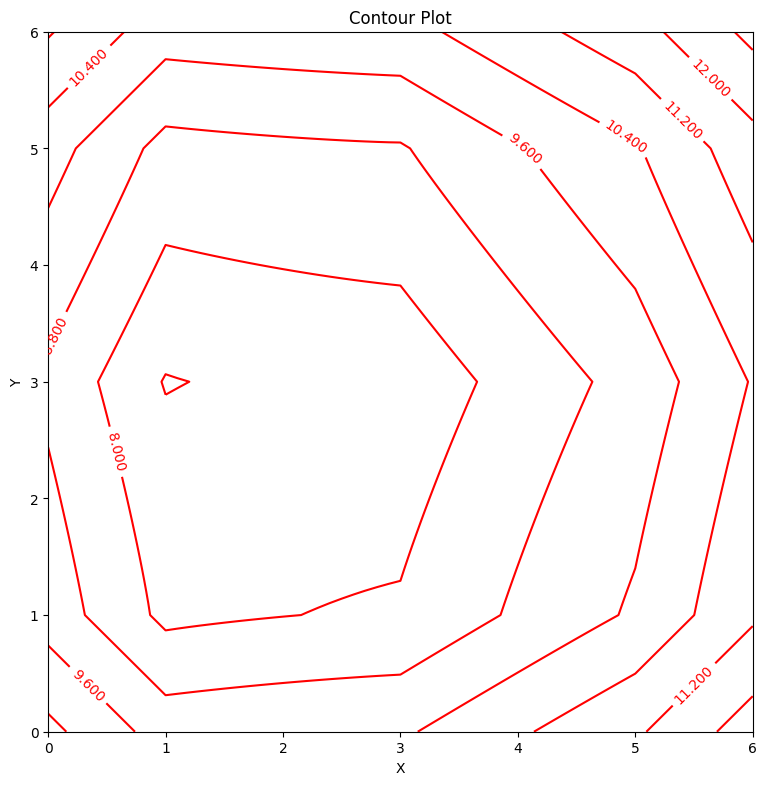

PyObject Text(0.5,1,'Contour Plot')

/usr/local/lib/python2.7/dist-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


In [6]:
fig = figure("pyplot_surfaceplot",figsize=(20,20))
ax = fig[:add_subplot](2,2,1)
cp = ax[:contour](xgrid, ygrid, zz, colors="red", linewidth=2.0)
ax[:clabel](cp, inline=1, fontsize=10)
xlabel("X")
ylabel("Y")
title("Contour Plot")


Examining the contour map we select a 2x2 square to examine closer. Below we specify the corners of the square (a,c), (b,c), (a,d) and (b,d).

In [7]:
a = 1 # x coordinate of the left side of the square
b = 3 # x coordinate of the right side of the square
c = 2 # y coordinate of the bottom of the square
d = 4 # y coordinate of the top of the square

4

Using the method of random search we optimize the location of the station. Using N random locations inside the 2x2 location specified above we return the location with the minimimum value returned for the average response time function (z). This value will be our optimal response time.

In [8]:
function Random(N) # A function that look for the maximum by taking random points in the bounds.
    xmin=(a+b)/2
    ymin=(c+d)/2
    zmin=z(xmin,ymin)
    for i=1:N
        x=(b-a)*rand()+a
        y=(d-c)*rand()+c
        zz=z(x,y)
        if zz<zmin
            xmin=x
            ymin=y
            zmin=zz
        end
    end
    return [xmin,ymin,zmin]
end


Random (generic function with 1 method)

Running $10,000$ trials we will get an approximation of the optimal location. This function will return the x-coordinate and y-coordinate of the station and the average response time in that order. 

In [9]:
Random(10000)

3-element Array{Float64,1}:
 1.00583
 3.00428
 7.152  

*(b)* Examine the sensitivity of the optimal location to the estimated number
of emergencies in each 2 × 2–mile sector. Can you draw any
general conclusions?

This function is similar to z function but you can increase the number of calls in any location with the di matrix. We use this matrix to see how increasing the number of calls in a 2x2 miles will change the optimal location of the station. 

In [10]:
function z2(x,y,i,di) # i is the location you wish to increase calls, dx is the amount you wish to increase calls by
    Dx= zeros(9,1)
    Dx[i] = di

    return 3.2+1.7/84* (f(x,y,1,5,6+Dx[3])+f(x,y,3,5,8+Dx[6])+f(x,y,5,5,8+Dx[9])+f(x,y,1,3,21+ Dx[2])+f(x,y,3,3,6+Dx[5])+f(x,y,5,3,3+Dx[8])+f(x,y,1,1,18 + Dx[1])+f(x,y,3,1,8+Dx[4])+f(x,y,5,1,6+Dx[7]))
end


z2 (generic function with 1 method)

The same random search method as before but with the change $z$ function, now $z2$.

In [11]:
function Random2(N,j,di) # A function that look for the maximum by taking random points in the bounds.
    xmin=(a+b)/2
    ymin=(c+d)/2
    zmin=z2(xmin,ymin,j,di)
    for i=1:N
        x=(b-a)*rand()+a
        y=(d-c)*rand()+c
        zz=z2(x,y,j,di)
        if zz<zmin
            xmin=x
            ymin=y
            zmin=zz
        end
    end
    return [xmin,ymin,zmin]
end

Random2 (generic function with 1 method)

This function finds the sensitivity of each location to an increase in calls. It does this by approximating the derivative of average response time over phones calls in one of 9 locations. Each sensitivity shows how the optimal place of the station would be adjusted if more calls came from that location. It would be useful for analysing how fluxuation in calls from a certain location would affect the optimal location of the station.

In [12]:
function sensitivity2x2(dx)
    calls = ones(9,1)
    calls = [18; 21;6;8;6;8;6;3;8]
    
    M_x, M_y =  Random(100000)
    
    for i in 1:9
        MM_x, MM_y = Random2(100000,i,dx)
        #println(MM_x, "   ", MM_y)
        sensitivity_x = (MM_x-M_x)/(dx)*calls[i]/M_x
        sensitivity_y = (MM_y-M_y)/(dx) * calls[i]/M_x
        println("location ", i," has sensitivities (x,y):  (", sensitivity_x,", ", sensitivity_y,")")
    end
    
end
sensitivity2x2(0.1)

location 1 has sensitivities (x,y):  (0.8789003326317201, 1.3552853918589216)
location 2 has sensitivities (x,y):  (0.47339863386898196, 2.2461963905475755)
location 3 has sensitivities (x,y):  (-0.031615871351706494, 0.39912760635599936)
location 4 has sensitivities (x,y):  (-0.02079965510379337, 0.6508044410439583)
location 5 has sensitivities (x,y):  (0.08928168902536432, 0.35447052453066397)
location 6 has sensitivities (x,y):  (0.03511961444286395, 0.26281728463588294)
location 7 has sensitivities (x,y):  (-0.09174833913036448, -0.002504058166724352)
location 8 has sensitivities (x,y):  (0.21964294600790943, 0.23269279003068033)
location 9 has sensitivities (x,y):  (0.1667727884955724, 0.74865738769451)




**Chapter 3 problem 7:** Reconsider the color TV problem of Example 2.1, but now use numerical methods instead of the analytic methods we employed in Chapter 2.

**Example 2.1**

A manufacturer of color TV sets is planning the introduction of two new products, a 19–inch LCD ﬂat panel set with a manufacturer’s suggested retail price (MSRP) of \$339 and a 21–inch LCD ﬂat panel set with an MSRP of \$399. The cost to the company is \$195 per 19–inch set and \$225 per 21–inch set, plus an additional \$400,000 in ﬁxed costs. In the competitive market in which these sets will be sold, the number of sales per year will aﬀect the average selling price. It is estimated that for each type of set, the average selling price drops by one cent for each additional unit sold. Furthermore, sales of the 19– inch set will aﬀect sales of the 21–inch set, and vice–versa. It is estimated that the average selling price for the 19–inch set will be reduced by an additional $0.3$ cents for each 21–inch set sold, and the price for the 21–inch set will decrease by $0.4$ cents for each 19–inch set sold. How many units of each type of set should be manufactured?

(After some calculation we get equation)

$$y(x_1,x_2) = (399 - 0.01x_1 - 0.003x_2)x_1 + (399 - 0.004x_1 - 0.01x_2)x_2 - (400,000 + 195x_1 + 225x_2) $$

Where $y$ is the profit from the from the sale of TV sets, $x_1$ is the number of 19-inch sets sold, and $x_2$ is the number of 21-inch sets sold. With this equation we find the gradian and the hessian of $y(x_1,x_2)$ and use two dimensional Newton's method to find the optimal $x_1$ and $x_2$ to maximize profits.



In [4]:
#Profit equation given in 2.2
y(x1,x2)= (339 - 0.01*x1 - 0.003*x2)*x1 + (399 - 0.004*x1 - 0.01*x2)*x2 - (400000 + 195*x1 + 225*x2)

#gradient of y(x₁,x₂) we want to find when this function is equal to zero
dy(x1,x2)= [(144-0.02*x1 - 0.007*x2), (-0.007*x1 + 174 - 0.02*x2)]

#Hessian of y(x₁,x₂) this is used in the newton's algorithm
DDy(x1,x2) = [[-0.02,   -0.007] [ -0.007,  -0.02]]

DDy (generic function with 1 method)

Using the equations the gradient and the hessian of $y(x_1,x_2)$ we can use Newton's method to find the critical points of the profit equation which will give us the optimal number of 19 and 21 inch TV's sold for maximizing profit. The first two inputs $dy$ and $ddy$ are the gradient of the profit equation and the hessian respectively. $w1$, $a1$ are the initial values of 19-inch and 21-inch TV's sold and N is the number of iterations.

In [5]:
function Newton(dy, ddy, w1,a1,N) #The Newton method in two dimensions. We use the operation "\". A\b is the solution of Ax=b.
    x=[w1,a1];
    for n=2:N
        x= x - ddy(x[1],x[2])[:,:,1]\dy(x[1],x[2])
    end
    return x
end

Newton (generic function with 1 method)

This will return the correct answer to the optimization problem with 4000, 7000 as the initial values of TV's sold. This returns solutions x₁= 4735 and x₂=7043, which implies the optimal number of TV's sold to maximize profit is 4,735 19-inch TVs and 7,043 21-inch TVs with a profit of \$553,641.

In [6]:
x1ₒ,x2ₒ= Newton(dy,DDy,4000,7000,4)
println(x1ₒ,"   ",x2ₒ)
print(y(4735,7043))

4735.042735042735   7042.735042735043
553641.0249999994

(b) As in Section 2.1, let $a$ denote the price elasticity for 19–inch sets. In part (a) we assumed $a = 0.01$. Now assume that a increases by 10% to $a = 0.011$ and repeat the optimization problem in part (a). Use your results to obtain a numerical estimate of the sensitivities $S(x_1, a)$, $S(x_2, a)$, and $S(y, a)$. Compare to the results obtained analytically in Section 2.1.

This next block defines our profit function with gradient and hessian again, this time with the altered price elasticity of $a = 0.01$. 

In [7]:
#Profit Equation with a = 0.011
y2(x1,x2)= (339 - 0.011*x1 - 0.003*x2)*x1 + (399 - 0.004*x1 - 0.01*x2)*x2 - (400000 + 195*x1 + 225*x2)

#Gradient Equation with a = 0.011
Dy2(x1,x2) = [-0.022x1+144-0.007x2, -0.02x2+174-0.007x1]

#Hessian Equation with a =0.011
DDy2(x1,x2) = [[-0.022,   -0.007] [-0.007, -0.02]]

DDy2 (generic function with 1 method)

This function determines the sensitivity of $x_1$, $x_2$ and $y$ to the price elasticity for 19-inch sets. It approximates the sensitivity, given by $S(x_1,a) = \frac{dx_1}{a} * \frac{a}{x_1}$, by approximating the derivative. This function completes all three sensitivities at once and returns them all one by one.

In [19]:
#y2, dy2, and ddy2 are the profit equation and its gradient and hessian respectively that you are analyzing
#w1 and a1 are the initial values used when the function calls Newton's method
function sensitivity!(y2,dy2,ddy2,w1,a1)
    #These are the optimal values found in problem 7(a) above
    x1₀ = 4735
    x2₀ = 7043
    yₒ = 553641.02
    
    #calculates the optimal values with our new equations with the altered 19-inch price
    yy = Newton(dy2,ddy2,w1,a1,10)
        
    sensitivity_x1 = (yy[1]- x1ₒ)/.001 * .01/x1ₒ
    sensitivity_x2 = (yy[2]- x2ₒ)/.001 * .01/x2ₒ
    sensitivity_y  = (y2(yy[1],yy[2])- yₒ)/.001 * .01/yₒ
    
    return sensitivity_x1, sensitivity_x2, sensitivity_y
end

sensitivity! (generic function with 1 method)

In [18]:
sensitivity_x₁, sensitivity_x₂, sensitivity_y = sensitivity!(y2,Dy2,DDy2,4000,7000)

println("S(x1, a) = ", sensitivity_x₁)
println("S(x2, a) = ", sensitivity_x₂)
println("S(y, a) = ", sensitivity_y)

S(x1, a) = -1.0230179028132995
S(x2, a) = 0.24073200407220702
S(y, a) = -0.36353797454957265


The sensitivities imply that a 10% increase in the price of 19-inch TV's will have a 10% decrease in the number of 19-inch TV's sold, a 2.4% increase in the number of 21-inch TV's sold and a 3.6% decrease in the total profit.

**Chapter 3 Problem 7(c):** Let $b$ denote the price elasticity for 21–inch sets. Currently, $b = 0:01$. As in part (b), use numerical methods to estimate the sensitivities of $x_1$, $x_2$, and $y$ to the parameter $b$.

This problem follows the same steps as (b), so we start by defining our profit equations with the price elasticity $b= 0.011$. Then we can use the function $sensitivity!$ to calculate the sensitivities.

In [20]:
#Profit Equation with b = 0.01
y3(x1,x2)= (339 - 0.01*x1 - 0.003*x2)*x1 + (399 - 0.004*x1 - 0.011*x2)*x2 - (400000 + 195*x1 + 225*x2)

#Gradient with b = 0.011
Dy3(x1,x2) = [-0.02x1+144-0.007x2, -0.022x2+174-0.007x1]

#Hessian with b = 0.011
DDy3(x1,x2) = [[-0.02,   -0.007] [-0.007, -0.022]]

DDy3 (generic function with 1 method)

In [21]:
sensitivity2_x₁, sensitivity2_x₂, sensitivity2_y = sensitivity!(y3,Dy3,DDy3, 4000,7000)


println("S(x1, a) = ", sensitivity2_x₁)
println("S(x2, a) = ", sensitivity2_x₂)
println("S(y, a) = ", sensitivity2_y)

S(x1, a) = 0.532560222330966
S(x2, a) = -1.023017902813299
S(y, a) = -0.8042382857746623


The sensitivities imply that a 10% increase in the price of 21-inch TV's will have a 5.3% increase in the optimal number of 19-inch TV's sold, a 10% decreases in the optimal number of 21-inch TV's sold and a 8.0% decrease in the total profit when selling the optimal amount of TV's.